## Level-1 Task-3: Geospatial Analysis
1. Visualize the locations of restaurants on a map using latitude and longitude information. </br>
2. Analyze the distribution of restaurants across different cities or countries. </br>
3. Determine if there is any correlation between the restaurant's location and its rating.

In [5]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load the dataset
data = pd.read_csv('Dataset .csv')

# Create a base map
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

# Add restaurant locations to the map
for idx, row in data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"{row['Restaurant Name']}: {row['Aggregate rating']}").add_to(restaurant_map)

# Save the map to an HTML file
restaurant_map.save('restaurant_map.html')


C:\Users\ahmed\AppData\Local\Temp\ipykernel_2916\3278647931.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_distribution.index, x=city_distribution.values, palette='viridis')


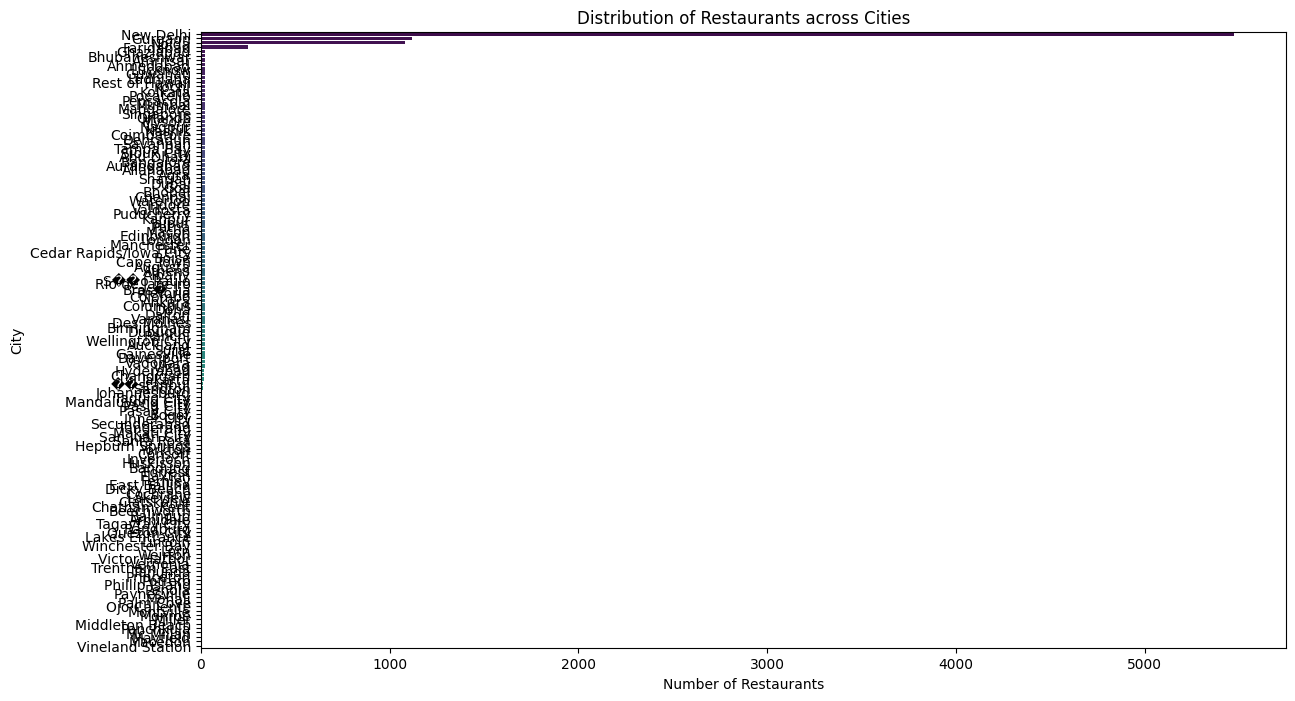

In [8]:
# Distribution of restaurants across different cities
city_distribution = data['City'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(y=city_distribution.index, x=city_distribution.values, palette='viridis')
plt.title('Distribution of Restaurants across Cities')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_2916\3058271771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_avg_rating.index, x=city_avg_rating.values, palette='coolwarm')


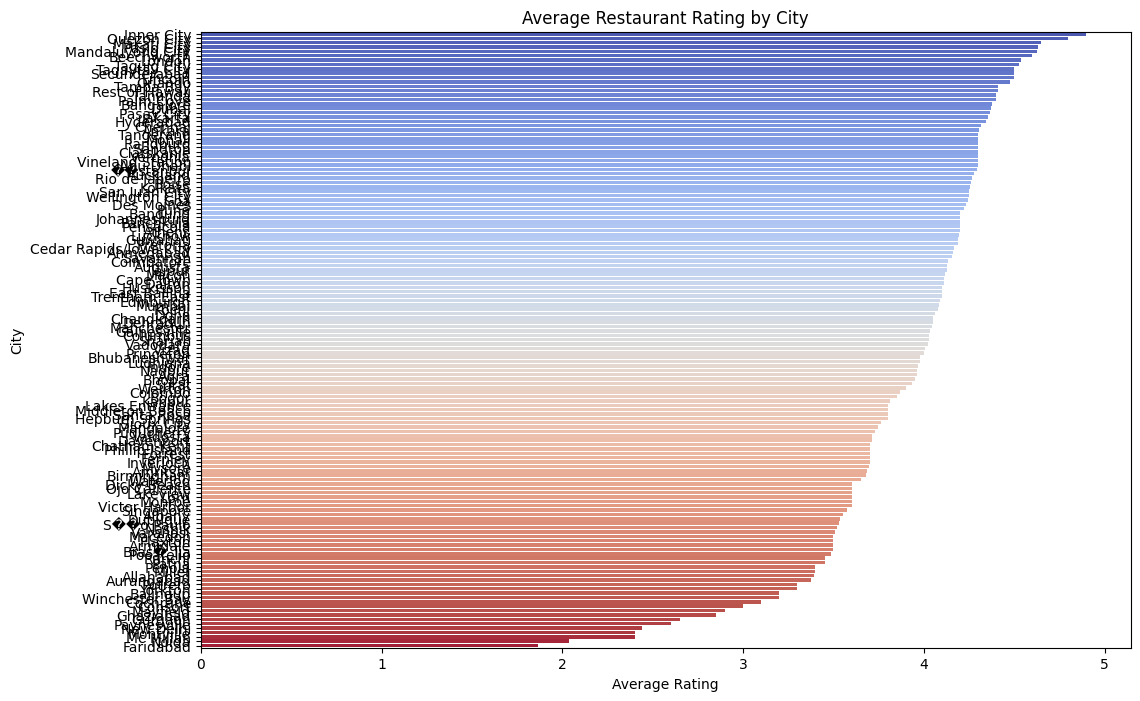

Correlation between Latitude, Longitude, and Aggregate Rating:
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


In [9]:
# Group by city and calculate the average rating
city_avg_rating = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y=city_avg_rating.index, x=city_avg_rating.values, palette='coolwarm')
plt.title('Average Restaurant Rating by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

# Correlation between latitude/longitude and rating
correlation = data[['Latitude', 'Longitude', 'Aggregate rating']].corr()

print("Correlation between Latitude, Longitude, and Aggregate Rating:")
print(correlation)
